In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [20]:
# Load the Fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [21]:
# Flatten the images for the linear model
train_images_flattened = train_images.reshape(train_images.shape[0], -1)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)


In [22]:
# Normalize the pixel values
train_images_flattened = train_images_flattened / 255.0
test_images_flattened = test_images_flattened / 255.0

In [23]:
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(train_images_flattened, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
# Predict on the test set
train_predictions = logistic_model.predict(train_images_flattened)
test_predictions = logistic_model.predict(test_images_flattened)

In [27]:
# Calculate accuracy
accuracy_train = accuracy_score(train_labels, train_predictions)
accuracy_test = accuracy_score(test_labels, test_predictions)

In [29]:
# Print accuracies
print(f"Model accuracy on the training set: {accuracy_train * 100:.2f}%")
print(f"Model accuracy on the test set: {accuracy_test * 100:.2f}%")

Model accuracy on the training set: 86.62%
Model accuracy on the test set: 84.39%


In [30]:
# Convert predicted class indices to names
predicted_labels = [class_names[i] for i in test_predictions]

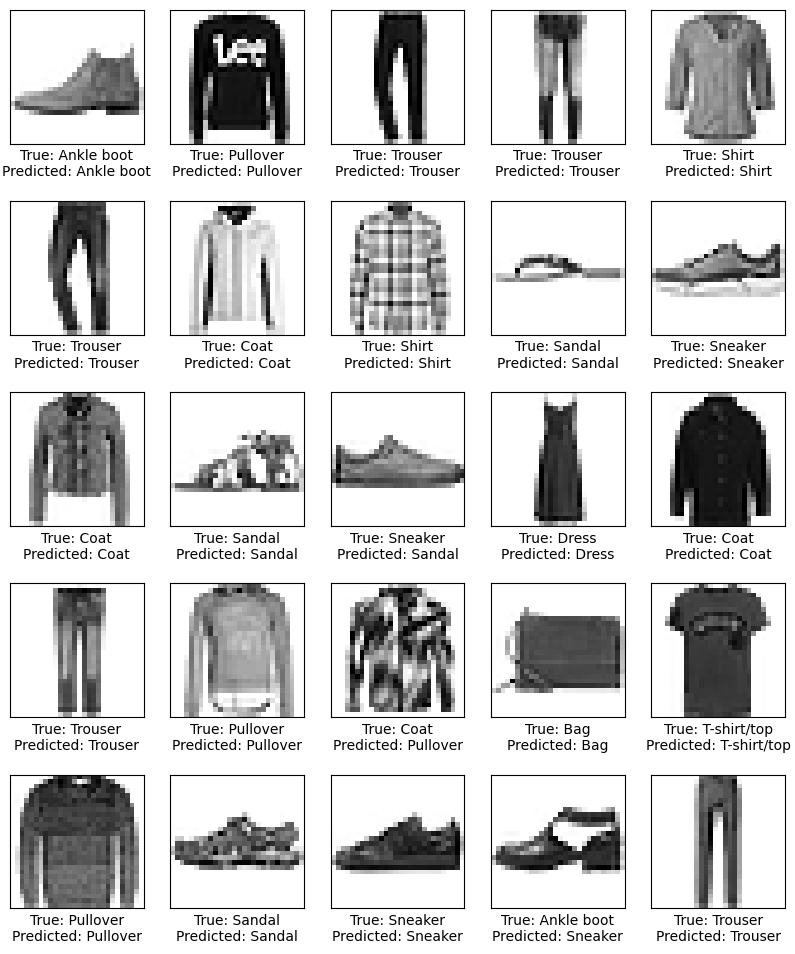

In [31]:
# Function to plot images and predictions
def plot_images(images, true_labels, predicted_labels, num_images=25):
    plt.figure(figsize=(10, 12))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(f"True: {class_names[true_labels[i]]}\nPredicted: {predicted_labels[i]}")
    plt.show()

# Plot some images with predictions
plot_images(test_images[:25], test_labels[:25], predicted_labels[:25])
